## Create FRF Bathymetry Files 1D
------


In [1]:
%matplotlib inline
import scipy
import numpy as np
import os, re
from scipy.interpolate import griddata, interp2d, interp1d
import matplotlib.pyplot as plt

In [2]:
ProjectDir = os.getcwd()  # get current path
FolderName = 'DEPTH_FILES' # folder name where DEPTH files are stored
DepthDir = os.path.join(ProjectDir,FolderName) # path to FolderName

# Upload Oct 1 profile
OldProfile = np.loadtxt(os.path.join(DepthDir,'depth_1D_2015-10-01.txt')) *-1
OldDx = 1.0 
xOld = np.arange(0,len(OldProfile[1,:])*OldDx,OldDx)
OldProfileIntersect = 430.0 #or 555.0 OldProfile intersect to Depth10m

# Upload LIDAr Foreshores by date  
foreshoreDir = os.path.join(DepthDir,'MEAN_FORESHORE') # import foreshore x & z vectors for each date
foreshoreList = []
XforeshoreList = []

for f in os.listdir((foreshoreDir)):
    if re.match('Foreshore', f):
        foreshoreList.append(f)
    elif re.match('Xforeshore', f):
        XforeshoreList.append(f)

foreshoreList = sorted(foreshoreList)
XforeshoreList = sorted(XforeshoreList)

# Upload foreshore - bathy intersect by date
ForeshoreIntersect = np.loadtxt(os.path.join(DepthDir,'foreshore_Oct1_intersec.txt'))  

# Final Bathy grid resolution 
newDx = 1.0 
newDy = 2.0 

In [5]:
for i in range(len(foreshoreList)):  
    date = foreshoreList[i][10:21].replace("-", "") 
    print('loading date:',date)
    
    OriginalForeshore = np.loadtxt(os.path.join(foreshoreDir,foreshoreList[i]))
    OriginalXforeshore = np.loadtxt(os.path.join(foreshoreDir,XforeshoreList[i]))
    
    nonNanForshoreIndex = int(np.argwhere(np.isfinite(OriginalForeshore[:30]))[0]) # index where finite values start in foreshore
    foreshore = OriginalForeshore[nonNanForshoreIndex:]
    Xforeshore = OriginalXforeshore[nonNanForshoreIndex:]
    Xforeshore2 = np.arange(0,len(Xforeshore)*0.1,0.1) # FUNWAVE LOCAL COORDINATES
    
    # find foreshore - bathy intercept index
    ForeshoreIndex = np.argmin(abs(Xforeshore2-ForeshoreIntersect[i])) # index of closest value to intercept in Xforeshore vector
    BathyIndex = np.argmin(abs(xOld-ForeshoreIntersect[i])) # index of closest value to intercept in Depth10mX
    
    xConcatenateForeshore2Oct1rstProfile = np.concatenate((Xforeshore2[:ForeshoreIndex], xOld[BathyIndex:]), axis=0) # concatenate vector sections
    
    DepthConcatenateForeshore2Oct1rstProfile = np.zeros([len(xConcatenateForeshore2Oct1rstProfile)]) # concatenate forshore to Depth10m cross-shore profiles

    DepthConcatenateForeshore2Oct1rstProfile[:] = np.concatenate((foreshore[:ForeshoreIndex], OldProfile[1,BathyIndex:]), axis=0)
    
    f_interp = interp1d(xConcatenateForeshore2Oct1rstProfile,DepthConcatenateForeshore2Oct1rstProfile, kind='linear')
    
    XinterpOriginal = np.arange(xConcatenateForeshore2Oct1rstProfile[0],xConcatenateForeshore2Oct1rstProfile[-1],newDx) # original FRF coordinates
    
    DepthInterp2Oct1rstProfile = f_interp(XinterpOriginal)
    
    NxConcatenate2Oct1rstProfile = len(DepthInterp2Oct1rstProfile)   
    
    ## Save 1D profiles
    Profile = np.zeros([3,NxConcatenate2Oct1rstProfile])
    for l in range(3):
        Profile[l,:] = DepthInterp2Oct1rstProfile[:] * -1 
    
    fileOut1D = os.path.join(ProjectDir,'1D_profiles','depth1D_Oct1rst_%smglob_%s.txt'%(str(len(DepthInterp2Oct1rstProfile)),str(date)))
    print('Saving File:',fileOut1D)
    np.savetxt(fileOut1D, Profile, fmt='%.6e', delimiter=' ', newline='\n', header='', footer='', comments='! ')
    

loading date: 2015100500
Saving File: /Users/rdchlgs8/Desktop/FRF/bathymetry/1D_profiles/depth1D_Oct1rst_1187mglob_2015100500.txt
loading date: 2015100501
Saving File: /Users/rdchlgs8/Desktop/FRF/bathymetry/1D_profiles/depth1D_Oct1rst_1187mglob_2015100501.txt
loading date: 2015100502
Saving File: /Users/rdchlgs8/Desktop/FRF/bathymetry/1D_profiles/depth1D_Oct1rst_1187mglob_2015100502.txt
loading date: 2015100503
Saving File: /Users/rdchlgs8/Desktop/FRF/bathymetry/1D_profiles/depth1D_Oct1rst_1187mglob_2015100503.txt
loading date: 2015100504
Saving File: /Users/rdchlgs8/Desktop/FRF/bathymetry/1D_profiles/depth1D_Oct1rst_1187mglob_2015100504.txt
loading date: 2015100505
Saving File: /Users/rdchlgs8/Desktop/FRF/bathymetry/1D_profiles/depth1D_Oct1rst_1187mglob_2015100505.txt
loading date: 2015100506
Saving File: /Users/rdchlgs8/Desktop/FRF/bathymetry/1D_profiles/depth1D_Oct1rst_1187mglob_2015100506.txt
loading date: 2015100507
Saving File: /Users/rdchlgs8/Desktop/FRF/bathymetry/1D_profiles/d

## FIND FORESHORE - OCT 1RST PROFILE INTERSECT

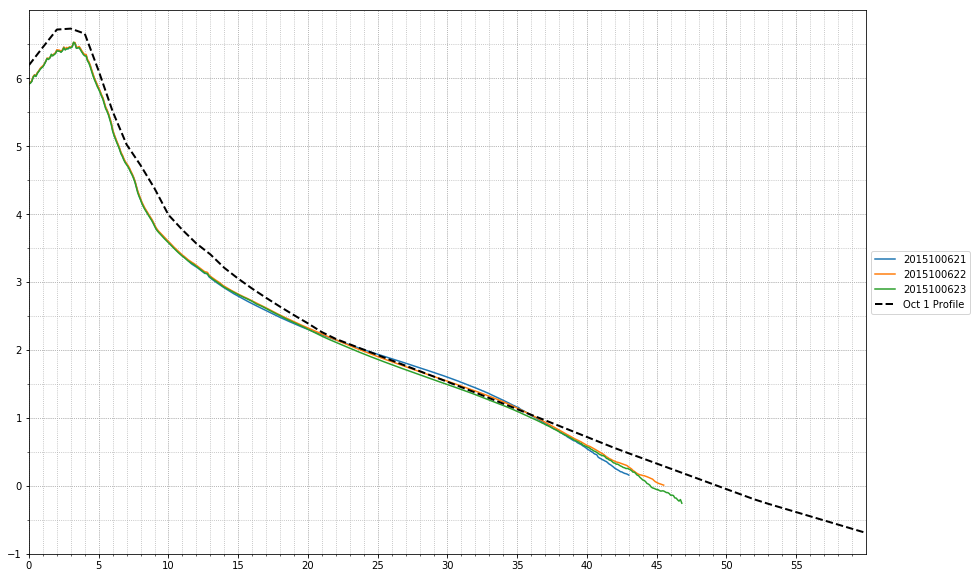

In [58]:
fig = plt.figure(figsize=(15.0,10.0))
ax = fig.add_subplot(1, 1, 1)

for i in range(43,46):  
    date = foreshoreList[i][10:21].replace("-", "") 
    
    
    OriginalForeshore = np.loadtxt(os.path.join(foreshoreDir,foreshoreList[i]))
    OriginalXforeshore = np.loadtxt(os.path.join(foreshoreDir,XforeshoreList[i]))
    
    nonNanForshoreIndex = int(np.argwhere(np.isfinite(OriginalForeshore[:30]))[0]) # index where finite values start in foreshore
    foreshore = OriginalForeshore[nonNanForshoreIndex:]
    Xforeshore = OriginalXforeshore[nonNanForshoreIndex:]
    
    Xforeshore2 = np.arange(0,len(Xforeshore)*0.1,0.1)
    
    plt.plot(Xforeshore2,foreshore,label='%s'%(date))
    plt.axis([0,60,-1,7])
    
plt.plot(xOld,OldProfile[1,:],'k--',linewidth=2.0,label='Oct 1 Profile')

x_major_ticks = np.arange(0, 60, 5)
x_minor_ticks = np.arange(0, 60, 1)
y_major_ticks = np.arange(-1, 7, 1)
y_minor_ticks = np.arange(-1, 7, 0.5)

ax.set_xticks(x_major_ticks)
ax.set_xticks(x_minor_ticks, minor=True)
ax.set_yticks(y_major_ticks)
ax.set_yticks(y_minor_ticks, minor=True)

ax.grid(linestyle=':',which='both')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

152.20000000000002